# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing dataset after Feature Engineering 

In [2]:
ls

Algerian_forest_fires_dataset_UPDATE.csv
Classification_model_selection.ipynb
EDA.csv
EDA.ipynb
Feature_Engineering.csv
Feature_Engineering.ipynb
Feature_Selection.csv
Feature_Selection.ipynb
LICENSE
README.md
Regression_Model_Selection.ipynb
regression.pkl


In [3]:
data= pd.read_csv("Feature_Engineering.csv")
df=data.copy()
df.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,index.1,day,month,year,Classes
0,0,-0.874735,-0.332478,0.986238,-0.671196,-0.949599,-0.974456,-0.930359,-0.844925,-1.005811,-0.894576,0,1.0,6.0,2012.0,0
1,1,-0.874735,-0.063185,-0.967025,2.027745,-1.047666,-0.911796,-0.930359,-0.918774,-0.966356,-0.908340,1,2.0,6.0,2012.0,0
2,2,-1.702005,1.350607,2.353522,2.027745,-2.304621,-1.055018,-0.941981,-1.091089,-1.061049,-0.949629,2,3.0,6.0,2012.0,0
3,3,-1.977761,1.821872,-0.967025,2.027745,-2.304621,-1.162435,-0.946630,-1.164937,-1.139961,-0.963392,3,4.0,6.0,2012.0,0
4,4,-1.426248,1.013990,0.204933,-0.671196,-1.017491,-1.010261,-0.776946,-0.869542,-0.966356,-0.894576,4,5.0,6.0,2012.0,0


# 3. Correlation

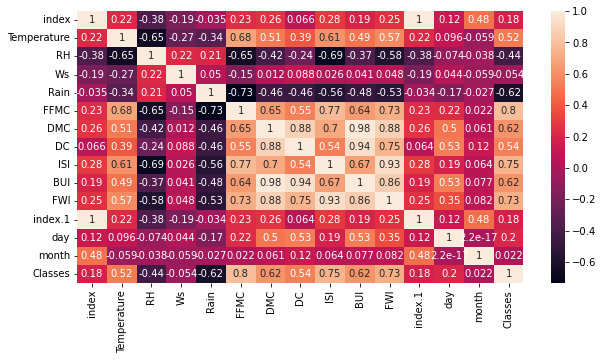

In [4]:
df_correlation = df.drop(columns=['year']).corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_correlation,annot=True)
plt.show()

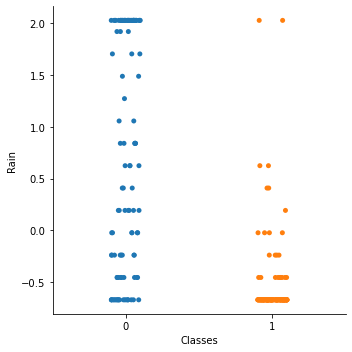

In [5]:
sns.catplot(x = 'Classes', y = 'Rain', data = df)

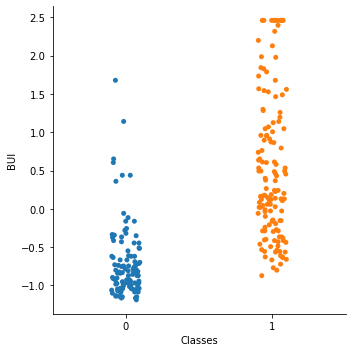

In [6]:
sns.catplot(x = 'Classes', y = 'BUI', data = df)

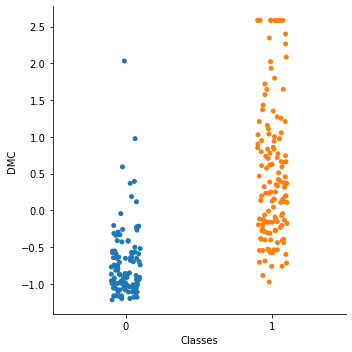

In [7]:
sns.catplot(x = 'Classes', y = 'DMC', data = df)

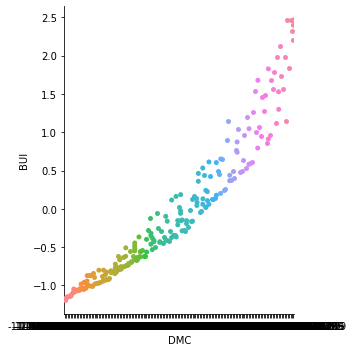

In [8]:
sns.catplot(x = 'DMC', y = 'BUI', data = df)

`Observation`: Strong correlation between BUI and DMC which value is 0.98

# 4. Remove Features

In [9]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features = correlation(df, 0.95)
#Remove features with correlations greater than 0.95
corr_features

{'BUI', 'index.1'}

In [11]:
#Remove features with correlations greater than 0.95
df.drop(corr_features,axis=1, inplace=True)

In [12]:
df.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,day,month,year,Classes
0,0,-0.874735,-0.332478,0.986238,-0.671196,-0.949599,-0.974456,-0.930359,-0.844925,-0.894576,1.0,6.0,2012.0,0
1,1,-0.874735,-0.063185,-0.967025,2.027745,-1.047666,-0.911796,-0.930359,-0.918774,-0.908340,2.0,6.0,2012.0,0
2,2,-1.702005,1.350607,2.353522,2.027745,-2.304621,-1.055018,-0.941981,-1.091089,-0.949629,3.0,6.0,2012.0,0
3,3,-1.977761,1.821872,-0.967025,2.027745,-2.304621,-1.162435,-0.946630,-1.164937,-0.963392,4.0,6.0,2012.0,0
4,4,-1.426248,1.013990,0.204933,-0.671196,-1.017491,-1.010261,-0.776946,-0.869542,-0.894576,5.0,6.0,2012.0,0


In [13]:
df.shape

(244, 14)

In [14]:
df.to_csv("Feature_Selection.csv",index=False)